<a href="https://colab.research.google.com/github/KgaleN/PDAN-part-1/blob/main/pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotions in text dataset
This dataset is designed for text document classification and comprises 21405 text entries across 6 emotions:  love, anger, fear, surprise, happy, and sadness. (Ishant, 2020)

## features:
- Text
- Emotion
<br/>
<br/>

__Labels__<br/>
It contains labels for 6 different categories:
 - love
 - anger
 - fear
 - surprise
 - happy
 - and sadness

__Text__<br/>
It contains text data which fits into one of the 6 emotions

### Upload Kaggle Api Token

In [90]:
# Fahim Alam
# https://medium.com/@abir29793/importing-datasets-from-kaggle-to-google-colab-084a7ceb7c18
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ngubaentandongubane","key":"d5d9f4d866c163ccbe789278c17a1ec4"}'}

### Install Kaggle Library

In [91]:
# Fahim Alam
# https://medium.com/@abir29793/importing-datasets-from-kaggle-to-google-colab-084a7ceb7c18
!pip install -q kaggle # install kaggle api client

### Make a Kaggle folder and move the json file into it

In [92]:
# Fahim Alam
# https://medium.com/@abir29793/importing-datasets-from-kaggle-to-google-colab-084a7ceb7c18
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

### Download the Kaggle Dataset

In [93]:
# Fahim Alam
# https://medium.com/@abir29793/importing-datasets-from-kaggle-to-google-colab-084a7ceb7c18
!kaggle datasets download -d ishantjuyal/emotions-in-text

Dataset URL: https://www.kaggle.com/datasets/ishantjuyal/emotions-in-text
License(s): copyright-authors
  0% 0.00/781k [00:00<?, ?B/s]
100% 781k/781k [00:00<00:00, 71.3MB/s]


### Unzip the dataset

In [94]:
# Fahim Alam
# https://medium.com/@abir29793/importing-datasets-from-kaggle-to-google-colab-084a7ceb7c18
!unzip -q emotions-in-text.zip

## Installing PySpark and Findspark

In [95]:
!pip install findspark
!pip install pyspark

## Starting the PySpark Session
This sets up an environment where PySpark and its tools can efficiently manage large datasets. It enables you to create DataFrames, analyze and manipulate data, and prepare it for modeling.

In [96]:
import pyspark
import findspark
from pyspark.sql import SparkSession

findspark.init()
spark = SparkSession.builder.appName('My Spark App').getOrCreate()

## Load Emotions dataset into PySpark DataFrame
The Emotion_final.csv file is loaded into a PySpark DataFrame. The *header=True* option ensures that the column headers are read from the CSV file, while *inferSchema=True* automatically determines the data type of each column based on the values.

In [97]:
csv_file_path = "/content/Emotion_final.csv"
df = spark.read.csv(csv_file_path, header=True, inferSchema=True, escape='"')

In [98]:
df.show(7,truncate=True)

+--------------------+--------+
|                Text| Emotion|
+--------------------+--------+
|i didnt feel humi...| sadness|
|i can go from fee...| sadness|
|im grabbing a min...|   anger|
|i am ever feeling...|    love|
|i am feeling grouchy|   anger|
|ive been feeling ...| sadness|
|ive been taking o...|surprise|
+--------------------+--------+
only showing top 7 rows



## Total amount of values in dataset

In [99]:
df.count()

21459

## Total amount of null values


*   *Text* Column as 0 null values
*   *Emotion* Column as 0 null values

In [100]:
#https://stackoverflow.com/questions/44627386/how-to-find-count-of-null-and-nan-values-for-each-column-in-a-pyspark-dataframe
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+----+-------+
|Text|Emotion|
+----+-------+
|   0|      0|
+----+-------+



## Total amount of values for each emotion
*   love has 1641 values
*   anger has 2993 values
*   fear has 2652 values
*   surprise has 879 values
*   happy has 7029 values
*   sadness has 6265 values

In [101]:
emotion_counts = df.groupBy("Emotion").count()
emotion_counts.show()

+--------+-----+
| Emotion|count|
+--------+-----+
|    love| 1641|
|   anger| 2993|
|    fear| 2652|
|surprise|  879|
|   happy| 7029|
| sadness| 6265|
+--------+-----+



## Visualising the distribution of emotion
The bar graph illustrates the distribution of different emotions in our dataset. Each bar represents a distinct emotion, with the height of the bar indicating the frequency or count of that emotion in the data.

### Observations:
The graph indicates a skewed distribution of emotions, with **Happy** and **Sadness** being the most frequently occurring emotions by a substantial margin. Both have significantly higher counts compared to other emotions like **Love**, **Fear**, **Anger**, and especially **Surprise**, which has the lowest count. This skew suggests that the dataset is dominated by **happiness** and **sadness**, while **surprise** and **love** are far less represented, which may impact the model's ability to accurately classify these less common emotions.


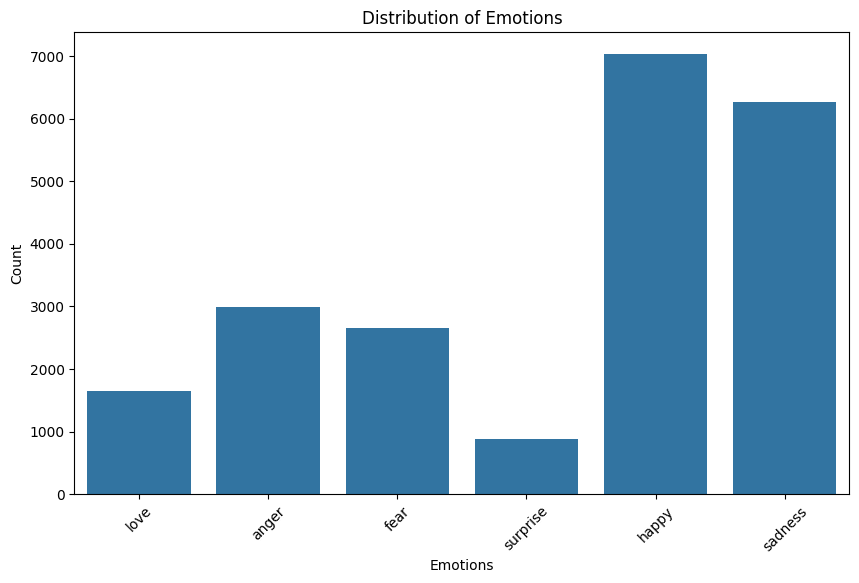

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion_counts = df.groupBy("Emotion").count().toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(x='Emotion', y='count', data=emotion_counts)
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

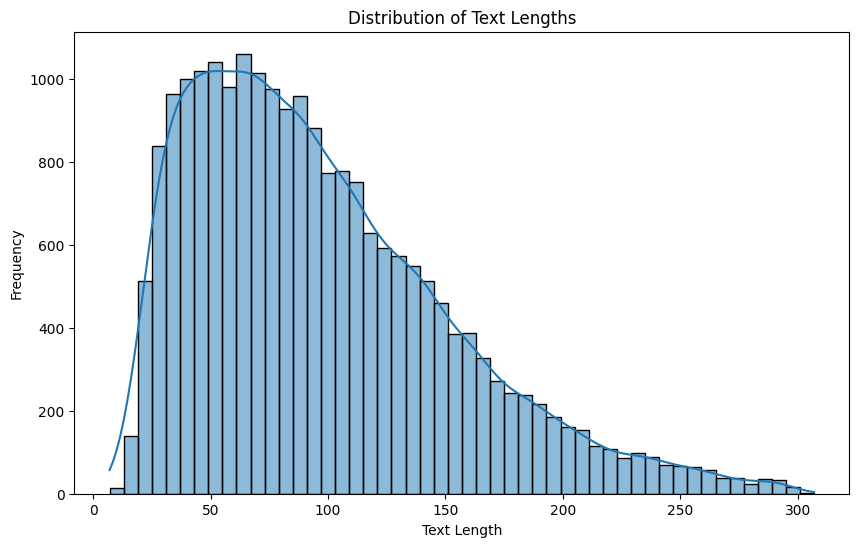

In [103]:
from pyspark.sql.functions import length

df_cleaned = df.withColumn('text_length', length(df['Text']))

text_length_pd = df_cleaned.select('text_length').toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(text_length_pd['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


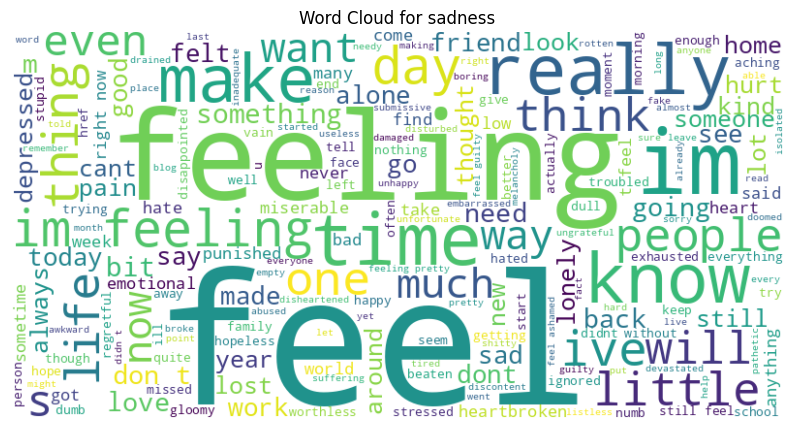

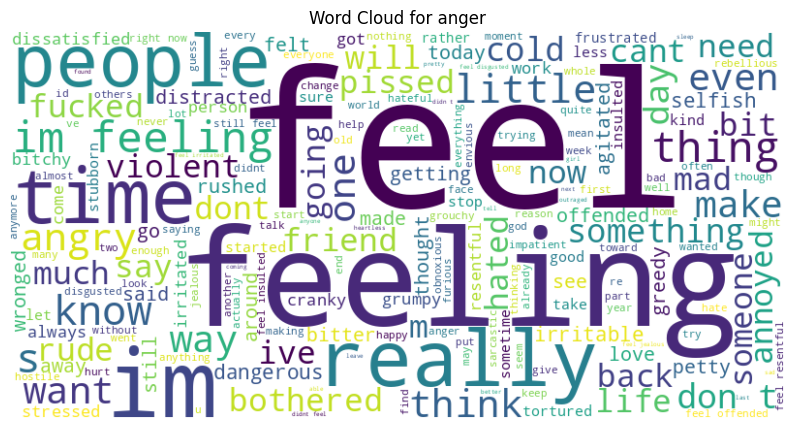

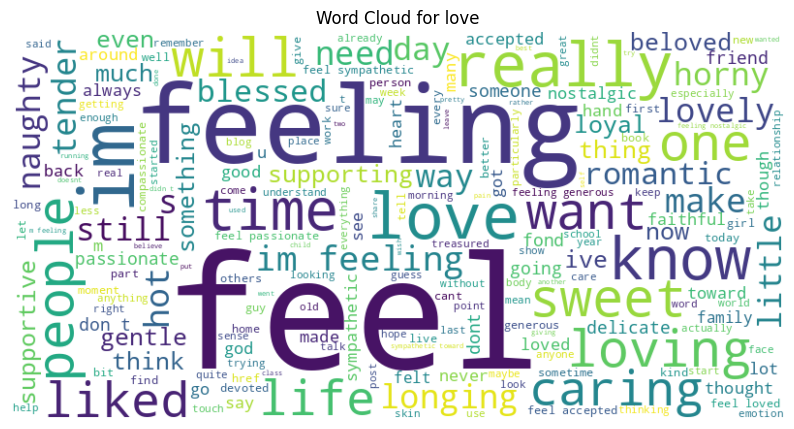

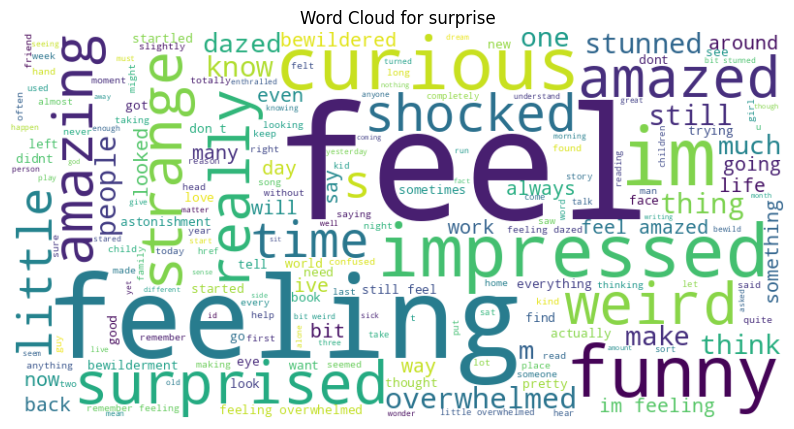

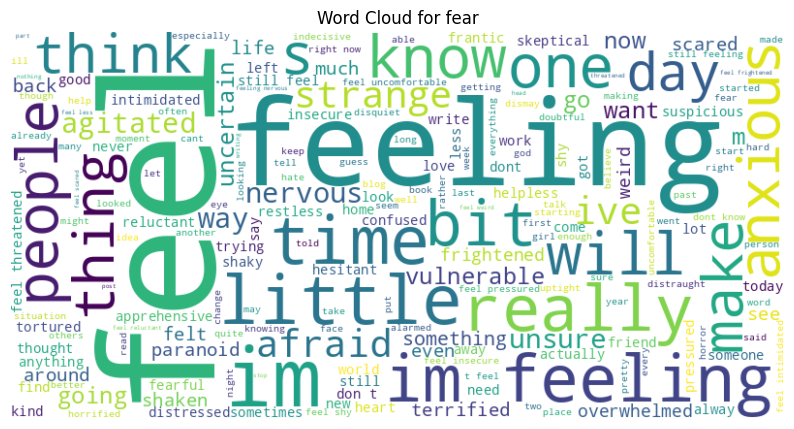

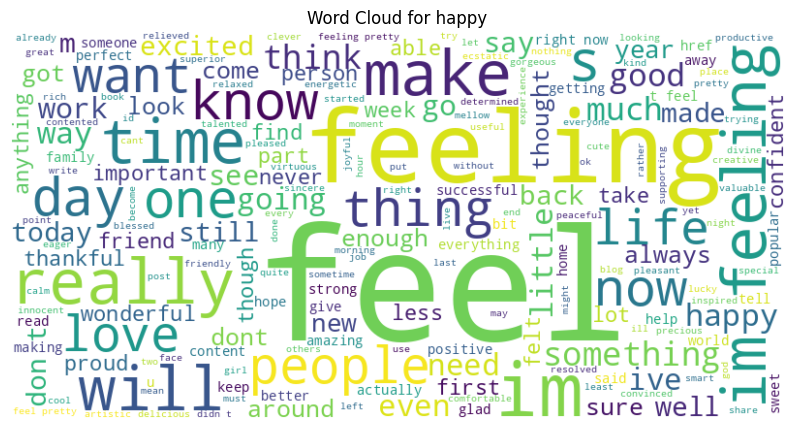

In [104]:
from wordcloud import WordCloud

# Convert PySpark DataFrame to pandas DataFrame
df_pd = df.toPandas()

# Create word clouds for each emotion
for emotion in df_pd['Emotion'].unique():
    text_data = ' '.join(df_pd[df_pd['Emotion'] == emotion]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {emotion}")
    plt.axis('off')
    plt.show()


## Making the values in text column lower case
With lowercasing, algorithms are able to treat the same words uniformly, regardless of whether they originally appeared in uppercase or lowercase. This prevents the model from interpreting identical words in different cases as separate entities, leading to more accurate analysis and improved performance. (codesignal)

In [105]:
from pyspark.sql.functions import lower
df = df.withColumn("text", lower(df["text"]))

In [106]:
df.show()

+--------------------+--------+
|                text| Emotion|
+--------------------+--------+
|i didnt feel humi...| sadness|
|i can go from fee...| sadness|
|im grabbing a min...|   anger|
|i am ever feeling...|    love|
|i am feeling grouchy|   anger|
|ive been feeling ...| sadness|
|ive been taking o...|surprise|
|i feel as confuse...|    fear|
|i have been with ...|   happy|
| i feel romantic too|    love|
|i feel like i hav...| sadness|
|i do feel that ru...|   happy|
|i think it s the ...|   anger|
|i feel low energy...| sadness|
|i have immense sy...|   happy|
|i do not feel rea...|   happy|
|i didnt really fe...| sadness|
|i feel pretty pat...| sadness|
|i started feeling...| sadness|
|i now feel compro...|    fear|
+--------------------+--------+
only showing top 20 rows



## Removing puncuation and unwanted symbols in text column values
Removing punctuation simplifies the data by reducing unnecessary noise, allowing algorithms to focus on the core textual content. This ensures uniformity and prevents misinterpretation of the dataset. As a result, models can learn more effectively, leading to improved accuracy and consistency in analysis.(MistrY. 2024)

In [107]:
from pyspark.sql.functions import *
df = df.withColumn('text', regexp_replace('text', '[^a-zA-Z0-9\s]', ''))

In [108]:
df.show()

+--------------------+--------+
|                text| Emotion|
+--------------------+--------+
|i didnt feel humi...| sadness|
|i can go from fee...| sadness|
|im grabbing a min...|   anger|
|i am ever feeling...|    love|
|i am feeling grouchy|   anger|
|ive been feeling ...| sadness|
|ive been taking o...|surprise|
|i feel as confuse...|    fear|
|i have been with ...|   happy|
| i feel romantic too|    love|
|i feel like i hav...| sadness|
|i do feel that ru...|   happy|
|i think it s the ...|   anger|
|i feel low energy...| sadness|
|i have immense sy...|   happy|
|i do not feel rea...|   happy|
|i didnt really fe...| sadness|
|i feel pretty pat...| sadness|
|i started feeling...| sadness|
|i now feel compro...|    fear|
+--------------------+--------+
only showing top 20 rows



## Import nltk stop words

In [109]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
# slingacademy
# https://www.slingacademy.com/article/how-to-clean-and-preprocess-text-data-with-pandas-3-examples/
stop_words = set(stopwords.words('english'))


In [111]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Remove stop words from the text column values
By removing stopwords, the dataset is simplified by eliminating common words that carry little meaningful information, such as "and," "the," and "is." This allows algorithms to focus on the more important and relevant words, which improves the model's ability to identify key patterns and relationships in the text. (Yadav, 2023)

In [112]:
stopwords_regex = '|'.join([f'\\b{word}\\b' for word in stop_words])

In [113]:
df = df.withColumn('text', regexp_replace('text', '|'.join(f'\\b{word}\\b' for word in stop_words), ''))

In [114]:
df.show(10)

+--------------------+--------+
|                text| Emotion|
+--------------------+--------+
| didnt feel humil...| sadness|
|  go  feeling  ho...| sadness|
|im grabbing  minu...|   anger|
|  ever feeling no...|    love|
|     feeling grouchy|   anger|
|ive  feeling  lit...| sadness|
|ive  taking  mill...|surprise|
| feel  confused  ...|    fear|
|    petronas  yea...|   happy|
|      feel romantic |    love|
+--------------------+--------+
only showing top 10 rows



## Remove the extra unwanted spacing where stopwords removed
The removal of stopwords from the text may leave empty spaces or gaps, potentially leading to misalignment in text processing or incorrect tokenization. This is why it's important to ensure these spaces are properly handled or removed to maintain data consistence.



In [115]:
df = df.withColumn('text', trim(regexp_replace('text', '\s+', ' ')))

In [116]:
df.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------+--------+
|text                                                                                                                                                   |Emotion |
+-------------------------------------------------------------------------------------------------------------------------------------------------------+--------+
|didnt feel humiliated                                                                                                                                  |sadness |
|go feeling hopeless damned hopeful around someone cares awake                                                                                          |sadness |
|im grabbing minute post feel greedy wrong                                                                                                              |anger   |
|ever feeling nostalgi

## Take the dataframe's text column values and makes a list
The text column values are converted into a list because tokenization, vectorization, and padding need data in a flexible format. PySpark DataFrames aren't suitable for these steps, so using a list makes it easier to process and prepare the text data.

In [117]:
lst = df.select('Text').rdd.flatMap(lambda x: x).collect()

## Tokenizing and Partially Vectorizing the Text
The list of text values tokenize converting each word into a numerical token. The *Tokenizer* assigns a unique number to each distinct word, creating sequences of numbers that represent the original sentences. This process partially vectorizes the text, as each word is now mapped to a numeric representation, making it easier for models to process the data. (Deep,2020)

In [118]:
from tensorflow.keras.preprocessing.text import Tokenizer

keras_tokenizer = Tokenizer()
keras_tokenizer.fit_on_texts(lst)
sequences = keras_tokenizer.texts_to_sequences(lst)


## calculates maximum sequence length
The maximum sequence length from the list of tokenized sequences. This is useful to standardize the input length for the model. The maximum sequence tells us the longest sequence in the dataset 35.


In [119]:
max_length = __builtins__.max(len(seq) for seq in sequences)
print("Maximum sequence length:", max_length)

Maximum sequence length: 35


## Add padding to the sequence
To ensures all text sequences have the same length by adding padding to the shorter ones. It adds zeros at the end of the shorter sequences so they match the length of the longest sequence *(max_length)*. This is important because many models need all input data to have the same size to process it correctly.









In [120]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [121]:
padded_sequences

array([[   54,     1,   545, ...,     0,     0,     0],
       [   31,     2,   428, ...,     0,     0,     0],
       [    4,  3258,  1056, ...,     0,     0,     0],
       ...,
       [ 9104,   389,  1055, ...,     0,     0,     0],
       [19160,   709,    30, ...,     0,     0,     0],
       [ 1395, 19162,     0, ...,     0,     0,     0]], dtype=int32)

## Take the dataframe's emotion column values and makes a list
The emotion column values are converted into a list because vectorization of the output values need data in a flexible format. PySpark DataFrames aren't suitable for vectorization, so using a list makes it easier to process and prepare the emotions categorised.

In [122]:
Sentiments = df.select('Emotion').rdd.flatMap(lambda x: x).collect()

## Vecorize the list of Emotion values
Label Encoding is used to convert categorical text labels, such as **happy** , **saddness**, or **angry** into integer values. Assigning a unique integer to each distinct category in the data. (Yadav, 2019)

One-Hot Encoding is used to convert integer-encoded labels into binary vectors. This encoding ensures that the model treats each category as a distinct entity without implying any ordinal relationships. (Yadav, 2019)





In [123]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming you have a 'label' column
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Sentiments)

# Convert labels to one-hot encoding
one_hot_labels = to_categorical(integer_encoded)

## Shape of Emotion output values
Number of data points in the dataset is 21459.

Number of emotion classes is 6.

This is the correct shape.

In [124]:
one_hot_labels.shape

(21459, 6)

## Shape of Text input values
Number of data points in the dataset is 21459.

Length of each padded text sequence is 35 (making sure that each data point has consistent length).

This is the correct shape.

In [125]:
padded_sequences.shape

(21459, 35)

## Randomly Spilt to Train Test
Both the list of processed Text data and Emotion data are split into training and testing data for model fitting and evaluation. 80% for training and 20% for testing.

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)


In [127]:
vocab_size = len(keras_tokenizer.word_index) + 1
print(vocab_size)

19163


### Configureing LSTM Model

**Hyper Parameters:**
   - `vocab_size`: The total number of unique words in the text data. This is determined by the tokenizer's vocabulary index.
   - `embedding_dim`: The size of each word's vector representation. In this case, each word is represented as a 100-dimensional vector.
   - `lstm_units`: The number of units in the LSTM layer. Here, 128 units are used to capture sequential patterns in the text.

**Model Layers:**
   - The model is created using the `Sequential` class, meaning layers are added one after the other.
   - **Embedding Layer**: The first layer is an embedding layer, which transforms words into dense vectors. It has an input dimension equal to the `vocab_size`, and the output dimension is the `embedding_dim`. The `input_length` ensures that each input sequence has a uniform length.

   - **LSTM Layer**: The LSTM layer follows the embedding layer and is responsible for learning long-term dependencies in the sequence data. The parameter `return_sequences=False` ensures that only the final output of the LSTM is passed to the next layer.

   - **Dense Layer**: The final layer is a fully connected `Dense` layer with units equal to the number of emotion categories (from the `one_hot_labels`), and it uses a `softmax` activation function to output probabilities for each emotion.

**Model Compilation:**
   - **Optimizer**: The model is compiled with the `adam` optimizer, which is efficient for training deep learning models.
   - **Loss Function**: The loss function used is `categorical_crossentropy`, which is appropriate for multi-class classification problems where the output is one of several categories.
   - **Metrics**: The model tracks `accuracy` during training to monitor its performance in predicting the correct category.


In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding


vocab_size = len(keras_tokenizer.word_index) + 1
embedding_dim = 100
lstm_units = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=lstm_units, return_sequences=False))
model.add(Dense(units=len(one_hot_labels[0]), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Fit the dataset to the LSTM model
**Fitting:** The model is trained on the dataset using the training data, where it learns to predict the emotions expressed in the text. During this fitting process, the model adjusts its parameters to recognize patterns in the data, improving its ability to accurately classify emotions.

**10 Epochs:** Model will process the entire dataset and update its parameters 10 times during training. Each epoch involves running all training examples through the model once, performing forward and backward passes to calculate and minimize errors, and adjusting the model's weights accordingly.

**Batch size 32:** The number of training examples processed together in one iteration of model training. It determines how many samples are used to compute gradients and update the model's weights at each step.

Although smaller batch sizes typically require more processing power and longer training times, a batch size of 32 was chosen. This choice is based on the belief that more frequent updates to the model will lead to more accurate predictions

In [129]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 55s 98ms/step - accuracy: 0.3098 - loss: 1.6030
Epoch 2/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 73s 82ms/step - accuracy: 0.3205 - loss: 1.5869
Epoch 3/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 97s 109ms/step - accuracy: 0.3586 - loss: 1.4712
Epoch 4/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 70s 87ms/step - accuracy: 0.3479 - loss: 1.4259
Epoch 5/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 44s 82ms/step - accuracy: 0.4244 - loss: 1.2334
Epoch 6/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 89s 95ms/step - accuracy: 0.5131 - loss: 0.9860
Epoch 7/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.7970 - loss: 0.5922
Epoch 8/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 88s 99ms/step - accuracy: 0.9253 - loss: 0.2526
Epoch 9/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 73s 82ms/step - accuracy: 0.9566 - loss: 0.1502
Epoch 10/10
537/537 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.9616 - loss: 0.1165


135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


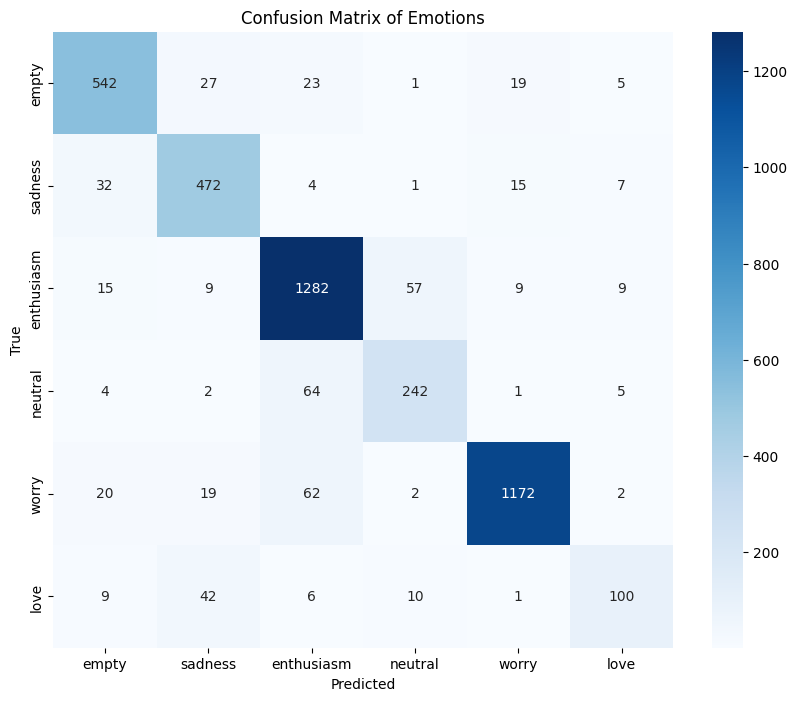

In [134]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

emotion_labels = ['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'love']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Emotions')
plt.show()


### Model Evaluation Results

The model was evaluated on the test dataset, and the results are as follows:

- **Accuracy during evaluation**: 0.8906 – This indicates that the model correctly predicted about 89.06% of the test data.
- **Loss during evaluation**: 0.3858 – The loss represents the model's prediction error during evaluation, with a lower value indicating better performance.

After evaluation, the final results were:

- **Test Loss**: 0.3945 – This is the error or difference between the predicted and actual values for the test dataset.
- **Test Accuracy**: 0.8877 – The model achieved an accuracy of 88.77% on the test dataset, slightly lower than the evaluation accuracy but still reflecting good performance.

These results suggest that the model is performing well, though there's a slight variance between evaluation accuracy and final test accuracy.


In [131]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8906 - loss: 0.3858
Test Loss: 0.3944912552833557, Test Accuracy: 0.8876980543136597


### Metrics:

1.   Precision: The proportion of positive predictions that were actually correct. Higher precision means fewer false positives.

2.   Recall: The proportion of actual positives that were correctly identified. Higher recall means fewer false negatives.

3.   F1-score: The harmonic mean of precision and recall, giving a balanced measure of the two. A higher F1-score indicates better performance.

4.   Support: The number of actual instances of each class in the test data.

### Breakdown by Emotions:
**empty:**

Precision: 0.87 – 87% of the time when the model predicted "empty," it was correct.
Recall: 0.88 – 88% of actual "empty" instances were correctly classified.
F1-score: 0.87 – Balance between precision and recall.
Support: 617 – There are 617 instances of the "empty" class in the test data.

**sadness:**

Precision: 0.83, Recall: 0.89, F1-score: 0.86 – Shows good performance on "sadness," with a slightly lower precision but high recall.
Support: 531 – 531 instances of "sadness."

**enthusiasm:**

Precision: 0.89, Recall: 0.93, F1-score: 0.91 – The model performs very well on this class.
Support: 1381 – This class has the most instances in the dataset.

**neutral:**

Precision: 0.77, Recall: 0.76, F1-score: 0.77 – Slightly lower performance here.
Support: 318 – Relatively fewer instances of "neutral."

**worry:**

Precision: 0.96, Recall: 0.92, F1-score: 0.94 – Excellent performance on this class.
Support: 1277 – A large number of instances.

**love:**

Precision: 0.78, Recall: 0.60, F1-score: 0.68 – The model struggles the most with "love," particularly in recall, meaning it misses many actual "love" instances.
Support: 168 – This class has the fewest instances.

Overall Metrics:
Accuracy: 0.89 – The model correctly classified 89% of the instances overall.






In [135]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_true, y_pred, target_names = emotion_labels)

# Print the report
print(report)

              precision    recall  f1-score   support

       empty       0.87      0.88      0.87       617
     sadness       0.83      0.89      0.86       531
  enthusiasm       0.89      0.93      0.91      1381
     neutral       0.77      0.76      0.77       318
       worry       0.96      0.92      0.94      1277
        love       0.78      0.60      0.68       168

    accuracy                           0.89      4292
   macro avg       0.85      0.83      0.84      4292
weighted avg       0.89      0.89      0.89      4292



## Reference
Data Headhunters. 2023. Text Data Cleaning: Techniques for Preprocessing and Normalization. 06 January 2024. [Online]. Available at: https://dataheadhunters.com/academy/text-data-cleaning-techniques-for-preprocessing-and-normalization/ [Accessed 06 September 2024].

MistrY, T. 2024. Text Data Cleaning: Techniques for Preprocessing and Normalization.Medium, 05 April 2024. [Online]. Available at: https://medium.com/@mistrytejasm/text-preprocessing-removing-punctuation-and-special-characters-e3de4cece082 [Accessed 06 September 2024].

Yadav, P. 2023. Text Data Preprocessing Made Easy: Steps to Clean Text Data Using Python. Meduim, 28 July 2023. [Online]. Available at: https://medium.com/@pawan329/text-data-preprocessing-made-easy-steps-to-clean-text-data-using-python-81a138a0e0e3 [Accessed 06 September 2024].

Deep, A. 2020. Understanding NLP Keras Tokenizer Class Arguments with example. Meduim, 22 August 2020. [Online]. Available at: https://medium.com/analytics-vidhya/understanding-nlp-keras-tokenizer-class-arguments-with-example-551c100f0cbd [Accessed 06 September 2024].

Yadav, D. 2019. Categorical encoding using Label-Encoding and One-Hot-Encoder. Meduim, 06 December 2019. [Online]. Available at: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd[Accessed 06 September 2024].

Codesignal. Lowercasing Text for Uniformity in NLP. learn.codesignal. [Online]. Available at: https://learn.codesignal.com/preview/lessons/2253/lowercasing-text-for-uniformity-in-nlp [Accessed 06 September 2024].
